In [ ]:
pwd

In [1]:
import os
import PIL
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

/data/aglinska/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
fn = './Data/haa500_v1_1_frames/video/'

In [3]:
folders = [folder for folder in os.listdir(fn) if not folder.startswith('.')]
folders.sort()
folders[0:5]

['ALS_IceBucket_Challenge',
 'CPR',
 'abseiling',
 'add_new_car_tire',
 'adjusting_glasses']

In [4]:
len(folders)

500

In [5]:
col_frames = np.zeros((len(folders),20))
col_masks = np.zeros((len(folders),20))

In [6]:
for f in tqdm(range(499)):
    for v in range(20):
        
        vid_name = folders[f]
        vid_num = f'{v:03d}'
        vid_dir = f'./Data/haa500_v1_1_frames/video/{vid_name}/{vid_name}_{vid_num}/'
        
        frames = [frame for frame in os.listdir(vid_dir) if frame.endswith('.png')]
        frames.sort()

        masks = [mask for mask in os.listdir(vid_dir) if mask.endswith('_masks.npy')]
        masks.sort()

        nframes = len(frames)
        nmasks = len(masks)
        
        col_frames[f,v] = nframes
        col_masks[f,v] = nmasks

100%|██████████████████████████████████████████████████████████████████████████████████████████| 499/499 [00:31<00:00, 15.84it/s]


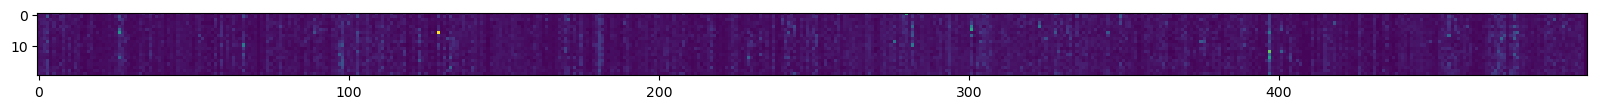

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(col_frames.transpose())

In [8]:
arr_isdone = col_frames==col_masks

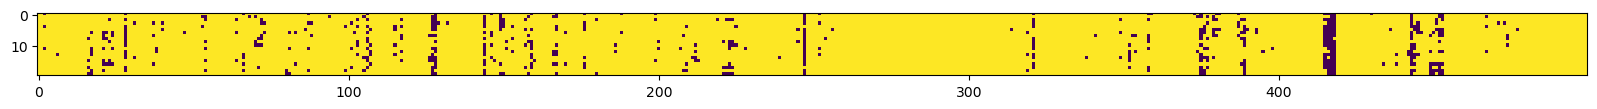

In [9]:
plt.figure(figsize=(20,10))
plt.imshow((arr_isdone).transpose())

In [10]:
print(f'M={arr_isdone.mean():.3f}, {arr_isdone.sum()}/{np.prod((arr_isdone).shape)}')

M=0.942, 9419/10000


In [11]:
####  M=0.942, 9419/10000

In [13]:
np.nonzero((arr_isdone).sum(axis=1)<5)[0] 

array([247, 416, 417, 418, 443])

In [ ]:
#417

In [17]:
np.sort(col_frames.flatten())[-20]

360.0

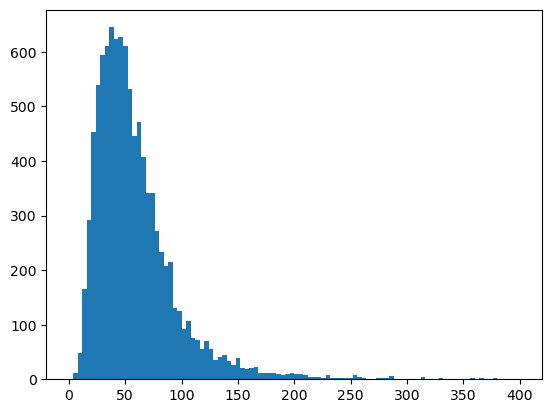

In [84]:
plt.hist(col_frames.flatten(),range=(0,400),bins=100);

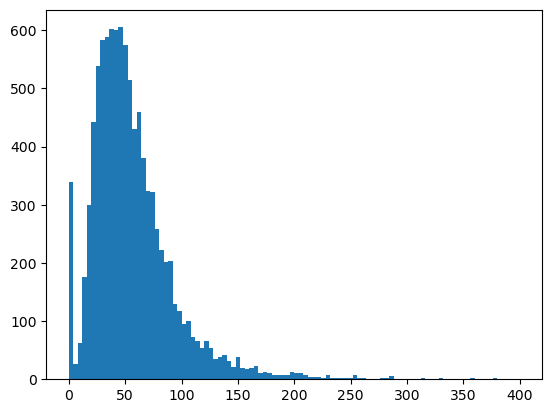

In [85]:
plt.hist(col_masks.flatten(),range=(0,400),bins=100);